# Data Visualization

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7f1b516ad1c140ce8739e4a826ef7cfb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dou1UKX9h-ex-eJ5H179R0bfOMyhJwc4QhkNhalVJmY0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_7f1b516ad1c140ce8739e4a826ef7cfb.get_object(Bucket='foodsecurity-donotdelete-pr-cilvxk81vtmfij',Key='FoodBalanceSheet Part1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Unnamed: 0,Country,Item,Element,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Afghanistan,"Fish, Seafood",Production,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,6.0,7.0,8.0,9.0
1,1,Afghanistan,"Fish, Seafood",Import,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Afghanistan,"Fish, Seafood",Domestic supply,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,6.0,7.0,8.0,9.0
3,3,Afghanistan,"Fish, Seafood",Human Consumption,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,6.0,7.0,8.0,9.0
4,4,Afghanistan,"Fish, Seafood",Other uses (non-food),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
df1 = df[df.Country.eq('Afghanistan')]
Items = list(df1['Item'].unique())

In [5]:
Years = list(df1.columns[3:]) 

In [6]:
def getValue(group, year):
    try:
        return df2.loc[(df.Element == group),year].iloc[0] 
    except IndexError:
        return 0

In [17]:
data = {}
for item in Items:
    df2 = df1[df1.Item.eq(item)]
    doc = []
    for year in Years:
            TotalConsumption = getValue('Human Consumption',year) + getValue('Export',year)  + getValue('Feed',year)  + getValue('Seed',year)  + getValue('Other uses (non-food)',year)  + getValue('Losses',year)  + getValue('Processing',year)  + getValue('Domestic supply',year)
            TotalProduction = getValue('Production',year) + getValue('Import',year) 
            FoodSDGap = TotalProduction - TotalConsumption
            doc.append({'Year':str(year),'Total Consumption':TotalConsumption,'Total Production':TotalProduction,'Food Supply Demand Gap':FoodSDGap})
    data[item] = doc


In [18]:
dataFrames=[]
for item in data.keys():
    dataFrames.append(pd.DataFrame(data[item]))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

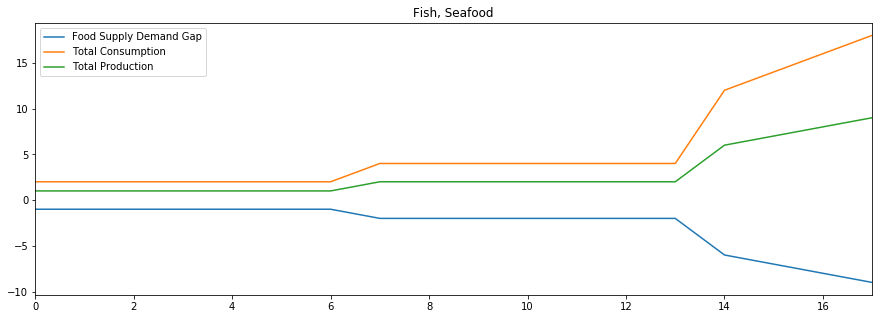

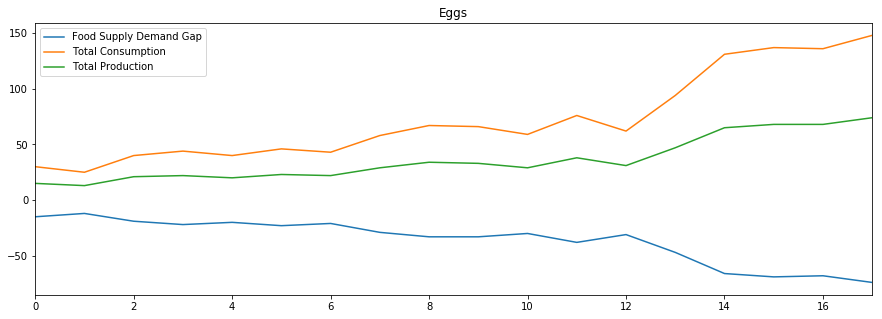

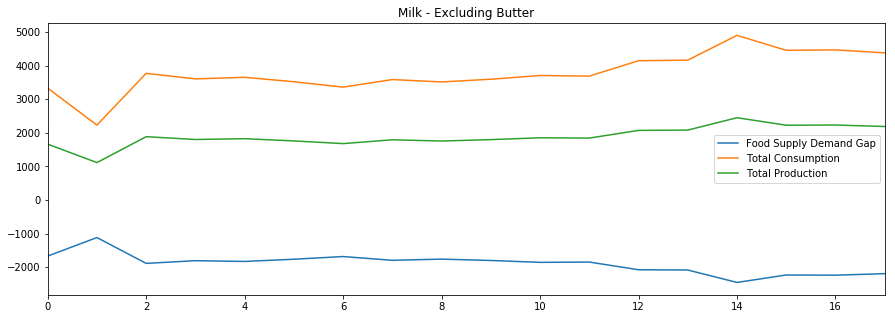

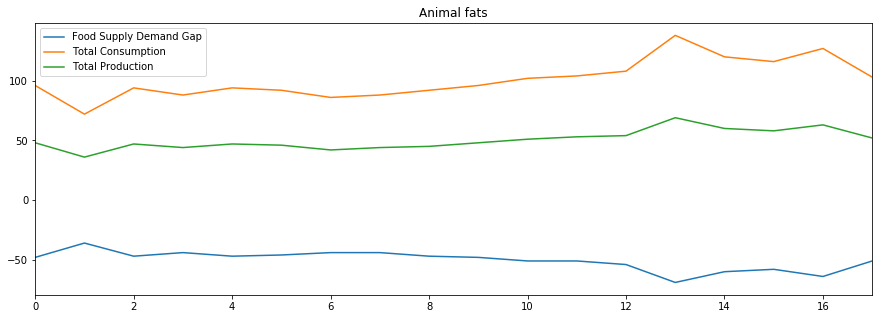

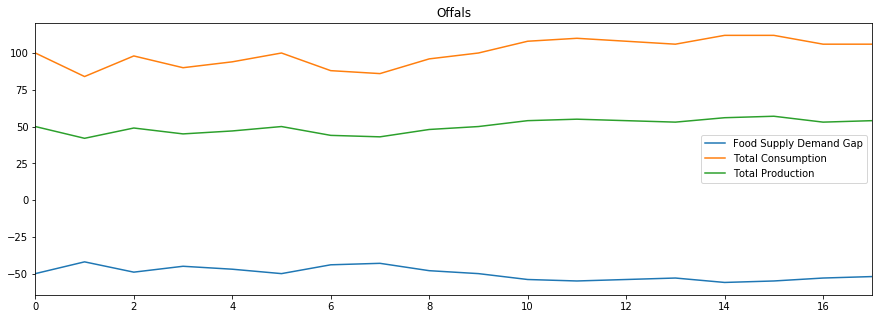

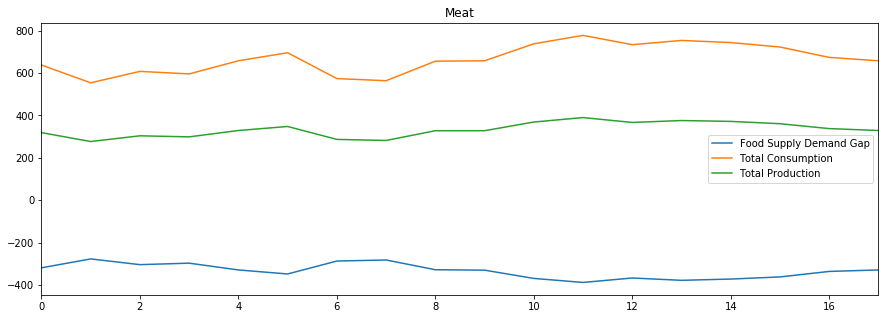

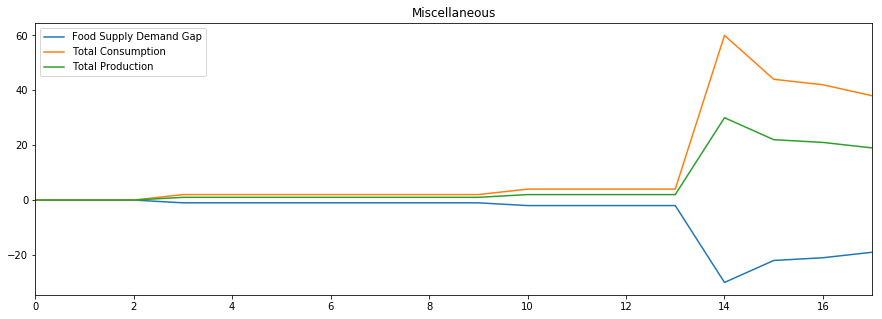

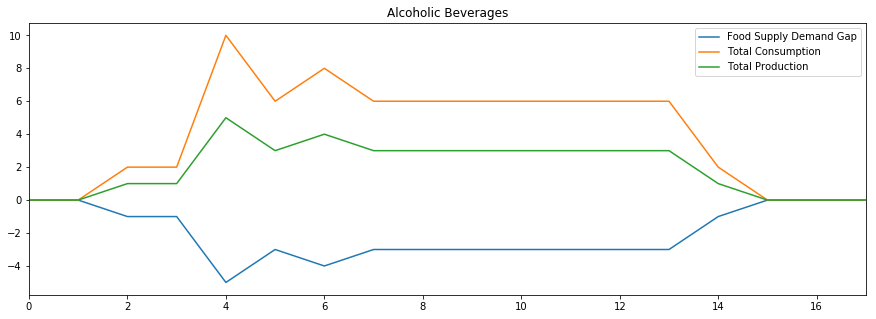

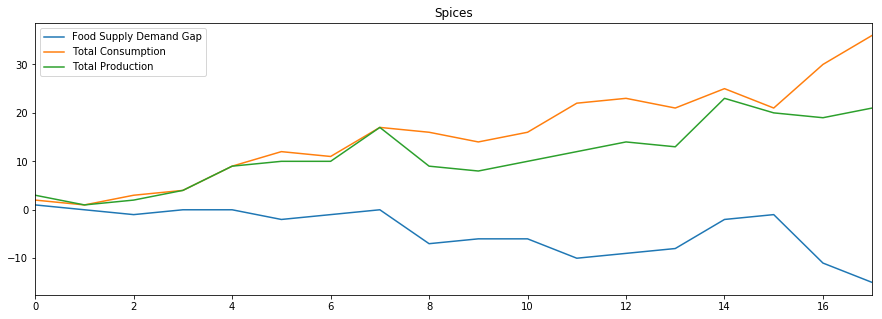

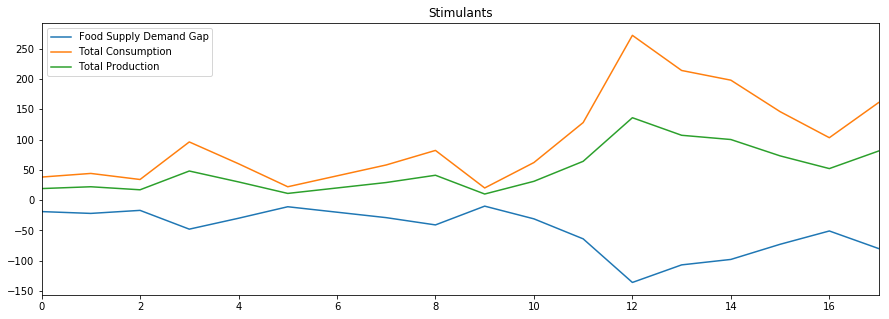

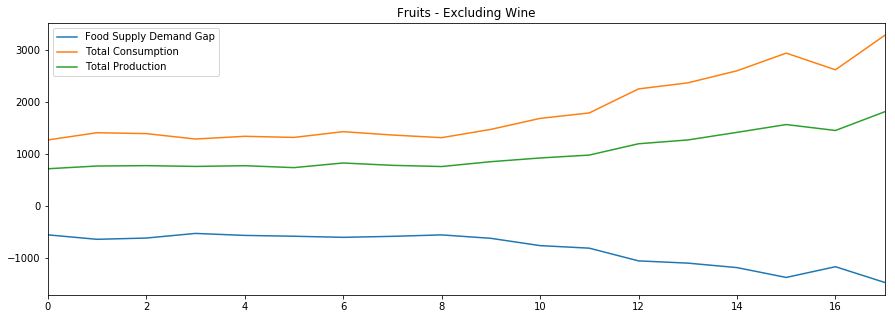

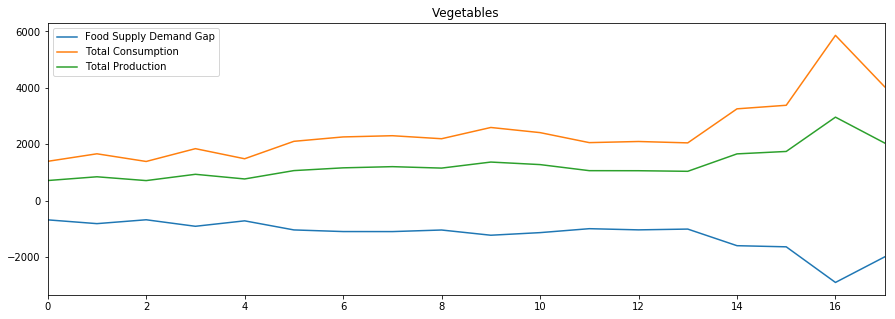

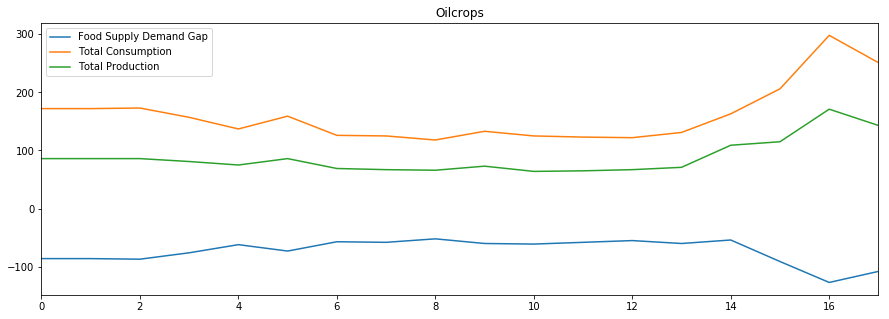

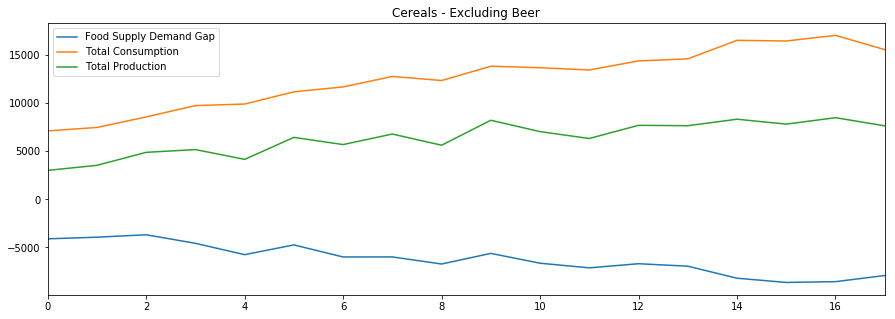

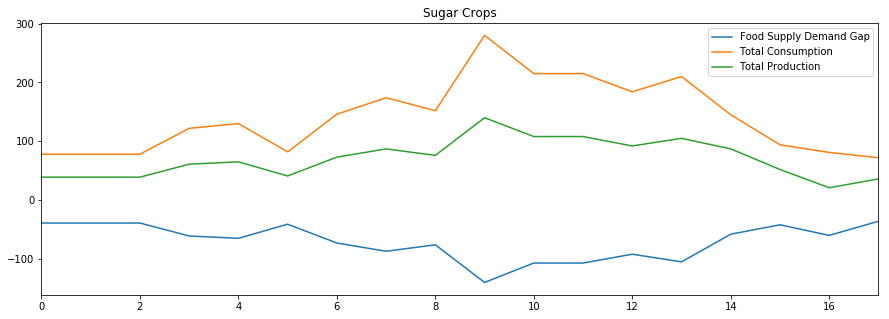

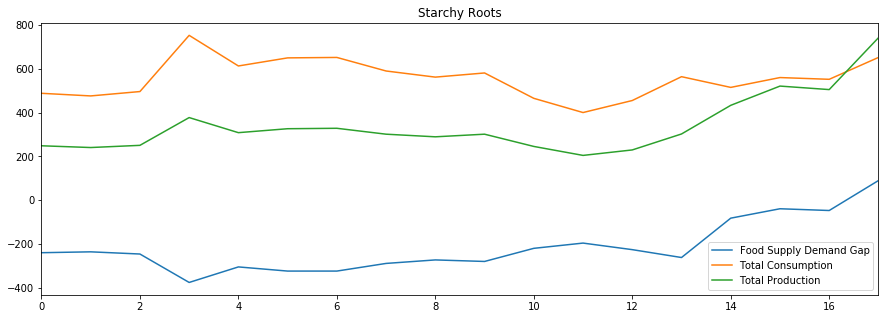

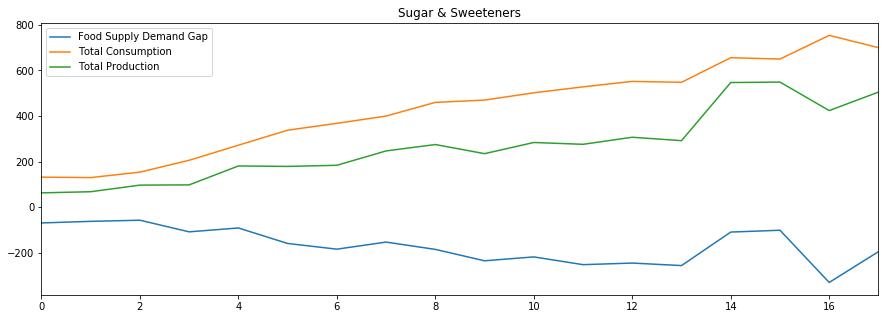

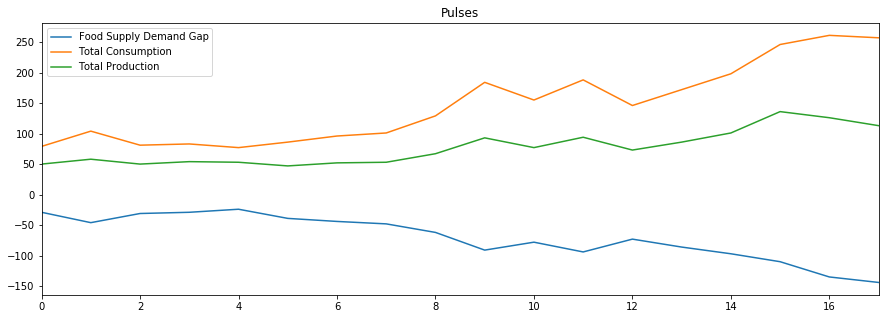

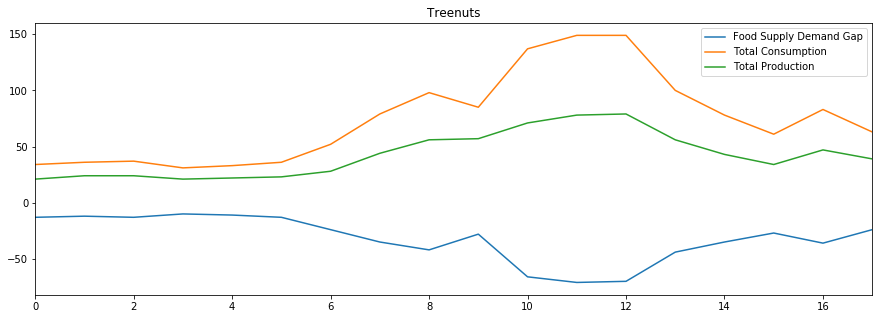

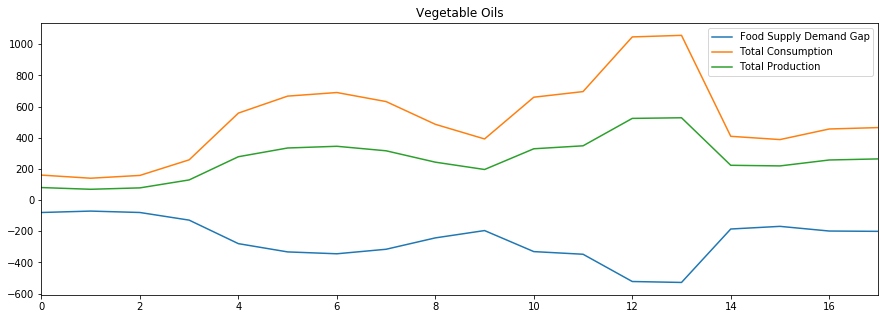

In [20]:
for i in range(len(dataFrames)):  
    dF = dataFrames[i]
    dF.plot(kind='line', figsize=(15,5))   
    plt.title(Items[i]) 
    plt.show()